# ME 395 Final Project
## Machlan Pettersen
### 12/20/2021


# Flow Physics

Using the Kolmogorov flow code setup, the physics of a chaotic chemical reaction were modeled.  

The reaction operates with four reagents, denoted as A, B, R, and S.
The governing equations that describe the behavior of these reagents over time are as follows:


$\frac{\partial A} {\partial t} + u\nabla A$ = $P^{-1}\nabla^{2}A - k_{1}AB$\
$\frac{\partial B} {\partial t} + u\nabla B$ = $P^{-1}\nabla^{2}B - k_{1}AB - k_{2}BR$\
$\frac{\partial R} {\partial t} + u\nabla R$ = $P^{-1}\nabla^{2}R + k_{1}AB - k_{2}BR$\
$\frac{\partial S} {\partial t} + u\nabla S$ = $P^{-1}\nabla^{2}S + k_{2}BR$

Where:\
$P$ = $1000$\
$k_{1}$ = $10$\
$k_{2}$ = $1$



# Numerical Setup
The flow is periodic in both directions, with Lx and Ly both equal to $2\pi$. The flow was modeled to run for 1 second, using a dynamic time step size initially set to 0.001 seconds.

To test the effect that grid resolution has on the simulation run time, the model was run with Nx and Ny equal to 128, 256, 512, 1024, and 2048 using 16 cores.

To test the effect that the number of computing cores has on the simulation run time, the model was run with 2, 4, 8, 16, and 32 cores with Nx and Ny equal to 128.

Seeing as both of these parameters are increasing grid resolution on the order of $X^2$, a parabolic curve is to be expected when run time is plotted over the resolution variable.


# Run Time vs. Grid Sizing @16 Cores


# Nx = Ny = 128
Run time: 27.46 sec\
Run time: 0.122030 cpu-hr\
cpu time/it = 2.680701e-02 sec

# Nx = Ny = 256

Run time: 53.69 sec\
Run time: 0.238605 cpu-hr\
cpu time/it = 2.283695e-02 sec


# Nx = Ny = 512
Run time: 194.30 sec\
Run time: 0.863558 cpu-hr\
cpu time/it = 3.053840e-02 sec

# Nx = Ny = 1024
Run time: 882.72 sec\
Run time: 3.923219 cpu-hr\
cpu time/it = 8.787499e-01 sec

# Nx = Ny = 2048
Run time: 6977.78 sec\
Run time: 31.012356 cpu-hr\
CPU: 4.566015e+00 sec

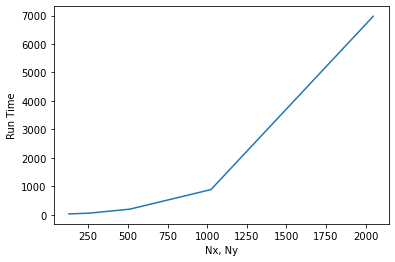

In [10]:
import matplotlib.pyplot as plt
N = [128,256,512,1024,2048]
RTN = [27.46,53.69,194.30,882.72,6977.78]
plt.plot(N,RTN)
plt.xlabel('Nx, Ny')
plt.ylabel('Run Time')

plt.show()

# CPU Time vs. Number of Cores Used @Nx = Ny = 128
# 2 cores:
Run time: 60.34 sec\
Run time: 0.033520 cpu-hr\
cpu time/it = 5.922201e-02 sec
# 4 cores:
Run time: 33.79 sec\
Run time: 0.037539 cpu-hr\
cpu time/it = 3.309840e-02 sec
# 8 cores:
Run time: 28.52 sec\
Run time: 0.063384 cpu-hr\
cpu time/it = 2.813272e-02 sec
# 16 cores:
Run time: 27.46 sec\
Run time: 0.122030 cpu-hr\
cpu time/it = 2.680701e-02 sec
# 32 cores:
Run time: 30.44 sec\
Run time: 0.270609 cpu-hr\
cpu time/it = 2.945592e-02 sec



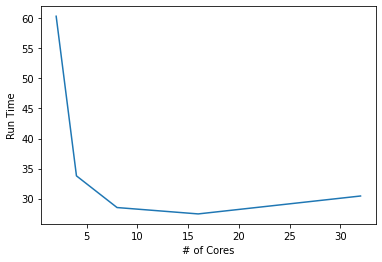

In [12]:
import matplotlib.pyplot as plt
RT = [60.34,33.79,28.52,27.46,30.44]
Cores = [2,4,8,16,32]
plt.plot(Cores,RT)
plt.xlabel('# of Cores')
plt.ylabel('Run Time')
plt.show()

# Conclusion
## Run time vs. grid sizing
As expected, as grid size resolution increased, so did CPU run time. Because this resolution with scaled for both the X and Y axes, each increase in Nx = Ny constitutes an increase in finite elements on the order of $X{^2}$. With each increase of grid resolution, more processes must be solved by the computer, resulting in longer run times for the simulation. This is reflected in the graph of run time vs. (Nx,Ny), as the curve takes on a parabolic shape representing the afore-mentioned increase in finite elements.
\
\
However, each increase in finite elements will improve the resolution of the simulation. This will capture the physics of the problem more effectively, reducing numerical error and providing a more accurate representation of what is happening in the real world. The goal of an engineer when setting grid resolution is to have a high enough Nx to capture all relevant characteristics of the flow, while keeping Nx as low as possible to keep CPU time low. 
## Run time vs number of cores
The results of this study also reflect what was initially expected: the more cores the simulation is run on, the faster the simulation completes **up to a certain point**. The more cores that are being used in parallel, the less iterations need to be calculated by each core, resulting in less CPU time. As with any job, having more "people" working on it means it will be completed faster. This is represented in the graph of run time vs. # of cores above, as run time drops significantly as the number of cores is increased.
\
\
**However**, the graph also shows a slight uptick as the # of cores is increased from 16 to 32. This is counterintuitive to the logic that has just been asserted. Why does this occur? Well, it turns out that increasing the # of cores actually has diminishing returns. Whenever a core finishes running a process, it has to communicate that data to the root process, which has to distribute that information to all of the other working cores. This communication takes a set amount of time depending on the physics of the simulation, so there is a certain point at which communication time between cores is actually taking longer than the CPU time per iteration. At this point, it will actually reduce CPU time to reduce the number of cores the sim is being run on.

